In [3]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:08:39--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:08:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-03-26 21:08:39 (5.51 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [4]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [5]:
data.shape

(4238, 16)

#### Medidas de tendencia central de las variables.

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

<Axes: xlabel='male', ylabel='count'>

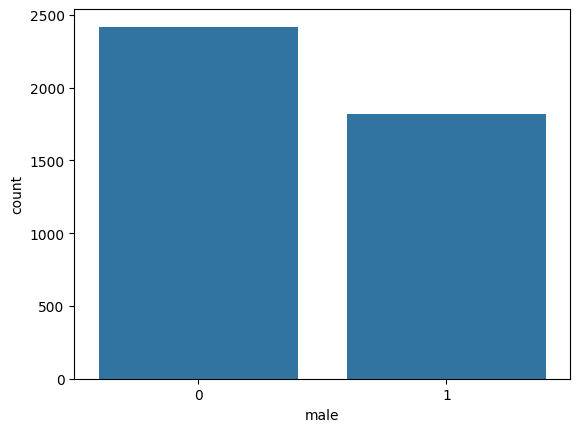

In [10]:
data["male"].value_counts()
import seaborn as sns
sns.barplot(data["male"].value_counts())

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



<Axes: xlabel='TenYearCHD', ylabel='count'>

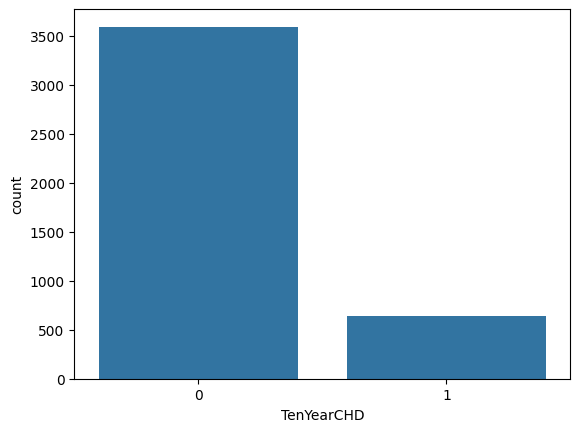

In [11]:
import seaborn as sns
sns.barplot(data["TenYearCHD"].value_counts())

#### Realice un grafico de densidad del BMI

<Axes: xlabel='BMI', ylabel='Density'>

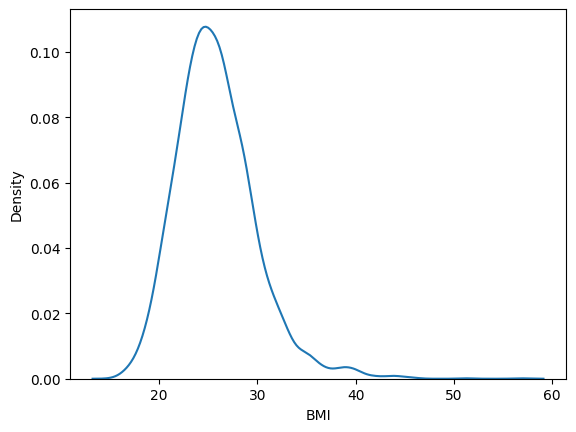

In [12]:
sns.kdeplot(data["BMI"])

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<Axes: xlabel='BMI', ylabel='Density'>

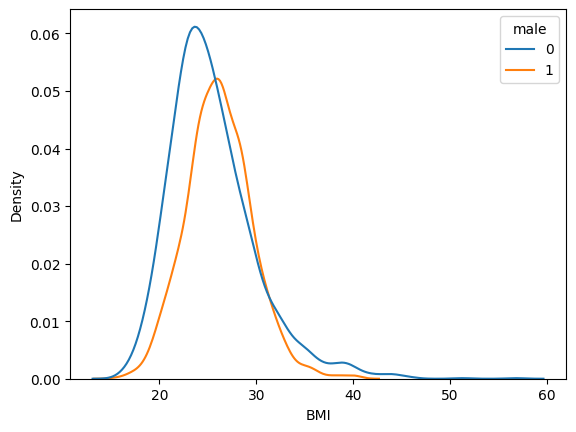

In [13]:
sns.kdeplot(data = data ,x = "BMI", hue="male")

#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

<Axes: >

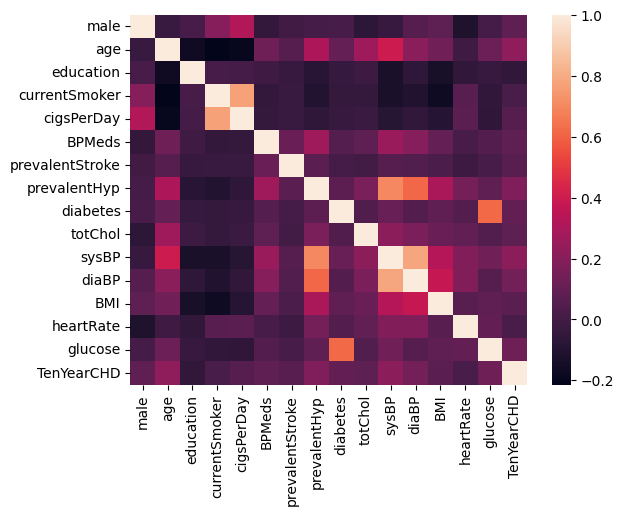

In [15]:
sns.heatmap(data.corr())


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

<Axes: xlabel='male', ylabel='BMI'>

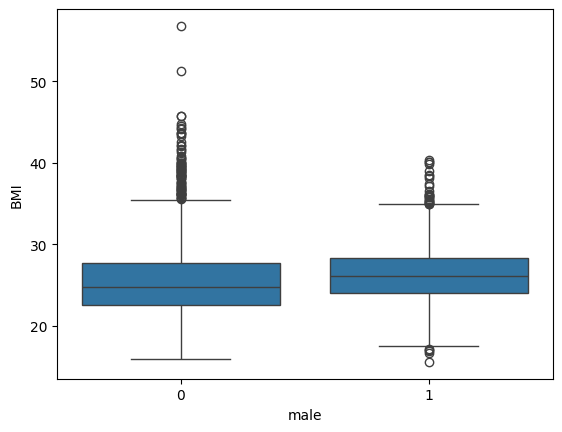

In [16]:
sns.boxplot(y= data["BMI"],x=data["male"])

<Axes: xlabel='male', ylabel='heartRate'>

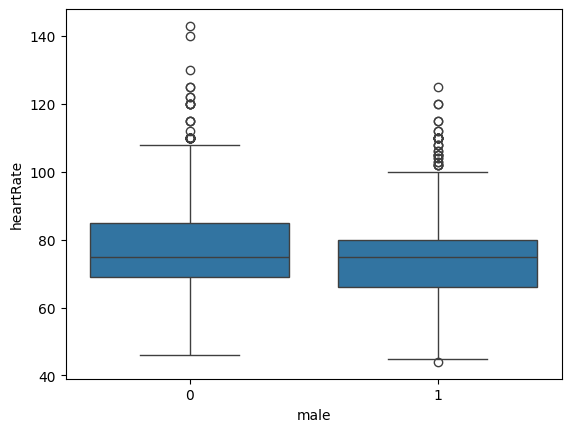

In [17]:
sns.boxplot(y= data["heartRate"],x=data["male"])

<Axes: xlabel='male', ylabel='glucose'>

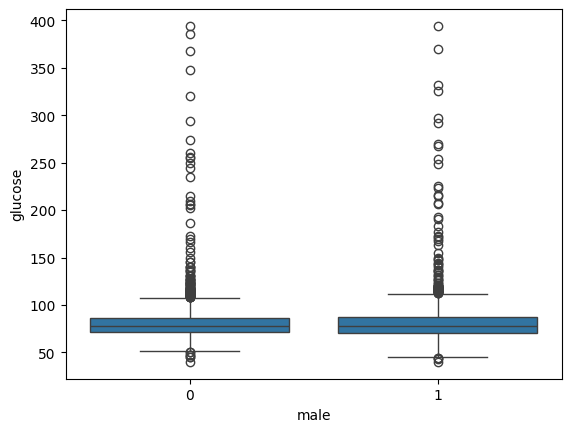

In [18]:
sns.boxplot(y= data["glucose"],x=data["male"])

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [23]:
import pandas as pd
nulos = data.isnull().sum()
print(nulos)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [26]:
data = data.dropna()
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Seleccione sus variables X y su variable y

In [28]:
X = data[['male', 'age',  'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [31]:
X_train.shape

(2559, 15)

In [32]:
X_test.shape

(1097, 15)

#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [33]:
y_train.value_counts()

,count
TenYearCHD,
0,2181
1,378


#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [35]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Crear instancia del modelo
logreg = LogisticRegression(class_weight='balanced')  # Usar class_weight='balanced' si tus clases están desbalanceadas

# Ajustar el modelo a tus datos (asumiendo que ya tienes X_train y y_train definidos)
logreg.fit(X_train, y_train)

# Obtener los coeficientes (los coeficientes del modelo)
coeficientes = logreg.coef_[0]  # Si tienes más de una clase, puedes elegir la clase que te interesa

# Obtener los nombres de las columnas de las características (variables)
nombres_columnas = X_train.columns if isinstance(X_train, pd.DataFrame) else np.array([f'feature_{i}' for i in range(X_train.shape[1])])

# Crear un DataFrame para visualizar los coeficientes de forma ordenada
coef_df = pd.DataFrame({
    'Característica': nombres_columnas,
    'Coeficiente': coeficientes
})

# Calcular el valor absoluto de los coeficientes para ver cuál tiene mayor impacto
coef_df['Valor absoluto'] = coef_df['Coeficiente'].abs()

# Ordenar por el valor absoluto de los coeficientes en orden descendente
coef_df = coef_df.sort_values(by='Valor absoluto', ascending=False)

# Mostrar el DataFrame con los coeficientes ordenados
print(coef_df)

# Identificar cuál característica tiene el coeficiente más grande en valor absoluto
max_coef = coef_df.iloc[0]
print(f"\nLa característica con mayor efecto sobre desarrollar una enfermedad cardiaca es: {max_coef['Característica']} con un coeficiente de {max_coef['Coeficiente']}")


     Característica  Coeficiente  Valor absoluto
7      prevalentHyp     0.583895        0.583895
0              male     0.397019        0.397019
8          diabetes     0.122998        0.122998
5            BPMeds     0.118385        0.118385
2         education    -0.103704        0.103704
3     currentSmoker    -0.099757        0.099757
6   prevalentStroke     0.078288        0.078288
1               age     0.034204        0.034204
13        heartRate    -0.024689        0.024689
4        cigsPerDay     0.024573        0.024573
12              BMI    -0.021722        0.021722
11            diaBP    -0.018339        0.018339
10            sysBP     0.013803        0.013803
14          glucose     0.003134        0.003134
9           totChol    -0.000054        0.000054

La característica con mayor efecto sobre desarrollar una enfermedad cardiaca es: prevalentHyp con un coeficiente de 0.5838947055788175


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Realizar predicciones sobre los datos de prueba
y_pred = logreg.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar los resultados
print("Matriz de Confusión:")
print(conf_matrix)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


Matriz de Confusión:
[[582 336]
 [ 56 123]]

Accuracy: 0.6427
Recall: 0.6872
Precision: 0.2680
F1-Score: 0.3856


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [41]:
y_prob = logreg.predict_proba(X_test)[:, 1]

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

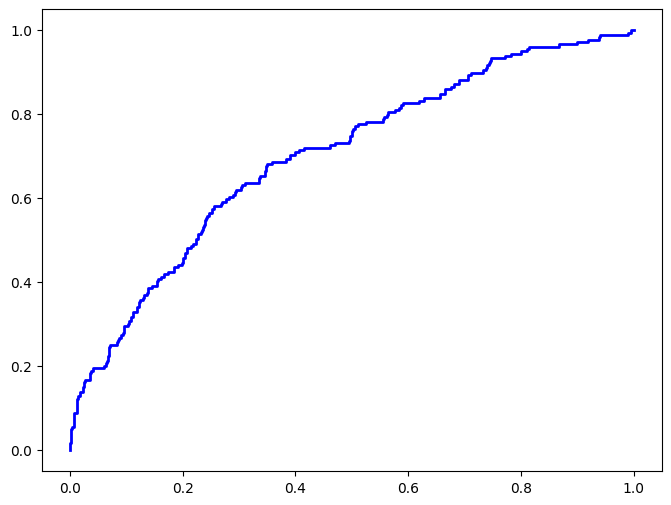

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')


## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de Confusión:
[[571 359]
 [ 63 104]]

Accuracy: 0.6153
Recall: 0.6228
Precision: 0.2246
F1-Score: 0.3302


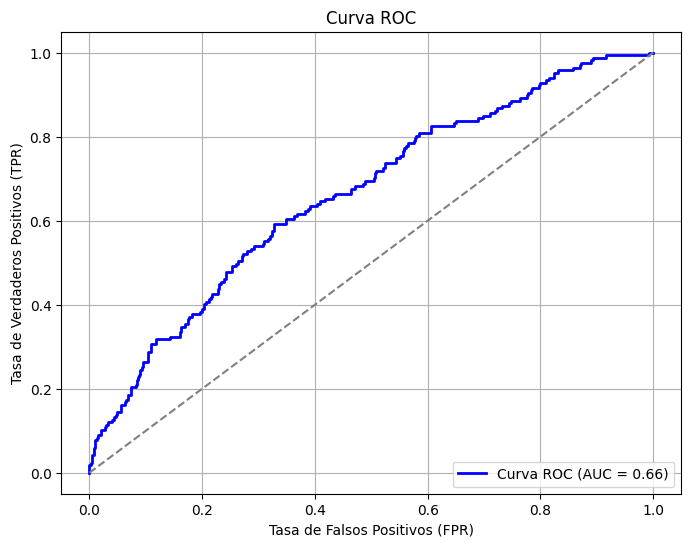


AUC: 0.6639


In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asumiendo que ya tienes X (características) y y (etiquetas) definidas

# Dividir los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de regresión logística
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_res, y_train_res)

# Realizar predicciones
y_pred = logreg.predict(X_test)

# Calcular las métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar las métricas
print("Matriz de Confusión:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calcular la curva ROC y AUC
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia (no discriminante)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Imprimir el valor del AUC
print(f"\nAUC: {roc_auc:.4f}")


## Pinter el resultado con SMOTE y sin SMOTE

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Sin SMOTE:
Matriz de Confusión:
[[594 336]
 [ 58 109]]
Accuracy: 0.6408
Recall: 0.6527
Precision: 0.2449
F1-Score: 0.3562


Con SMOTE:
Matriz de Confusión:
[[571 359]
 [ 63 104]]
Accuracy: 0.6153
Recall: 0.6228
Precision: 0.2246
F1-Score: 0.3302


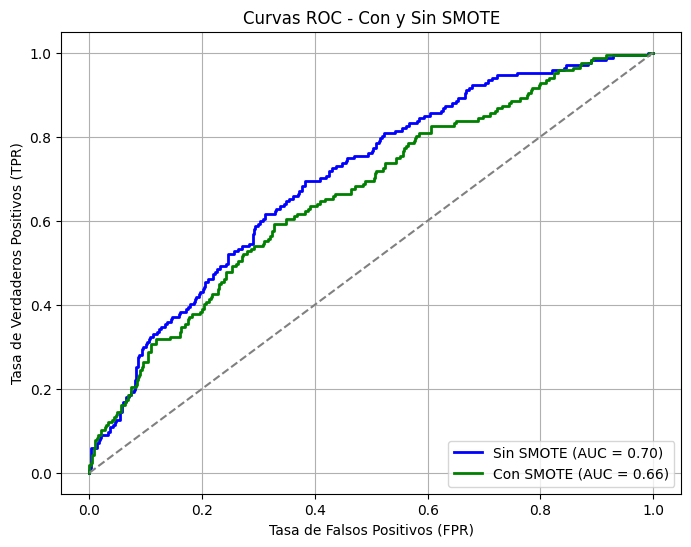


AUC Sin SMOTE: 0.7010
AUC Con SMOTE: 0.6639


In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asumiendo que ya tienes X (características) y y (etiquetas) definidas

# Dividir los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. Entrenar el modelo sin SMOTE (sin balancear las clases)
logreg_no_smote = LogisticRegression(class_weight='balanced')
logreg_no_smote.fit(X_train, y_train)

# Predicciones sin SMOTE
y_pred_no_smote = logreg_no_smote.predict(X_test)

# Calcular métricas sin SMOTE
conf_matrix_no_smote = confusion_matrix(y_test, y_pred_no_smote)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
recall_no_smote = recall_score(y_test, y_pred_no_smote)
precision_no_smote = precision_score(y_test, y_pred_no_smote)
f1_no_smote = f1_score(y_test, y_pred_no_smote)

# 2. Aplicar SMOTE y entrenar el modelo
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression(class_weight='balanced')
logreg_smote.fit(X_train_res, y_train_res)

# Predicciones con SMOTE
y_pred_smote = logreg_smote.predict(X_test)

# Calcular métricas con SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# Mostrar resultados sin y con SMOTE
print("Sin SMOTE:")
print("Matriz de Confusión:")
print(conf_matrix_no_smote)
print(f"Accuracy: {accuracy_no_smote:.4f}")
print(f"Recall: {recall_no_smote:.4f}")
print(f"Precision: {precision_no_smote:.4f}")
print(f"F1-Score: {f1_no_smote:.4f}")
print("\n")

print("Con SMOTE:")
print("Matriz de Confusión:")
print(conf_matrix_smote)
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"F1-Score: {f1_smote:.4f}")

# Calcular la curva ROC y AUC para ambas configuraciones
y_prob_no_smote = logreg_no_smote.predict_proba(X_test)[:, 1]
fpr_no_smote, tpr_no_smote, thresholds_no_smote = roc_curve(y_test, y_prob_no_smote)
roc_auc_no_smote = auc(fpr_no_smote, tpr_no_smote)

y_prob_smote = logreg_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Graficar las curvas ROC para ambas configuraciones
plt.figure(figsize=(8, 6))

# Curva ROC sin SMOTE
plt.plot(fpr_no_smote, tpr_no_smote, color='blue', lw=2, label=f'Sin SMOTE (AUC = {roc_auc_no_smote:.2f})')

# Curva ROC con SMOTE
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label=f'Con SMOTE (AUC = {roc_auc_smote:.2f})')

# Línea diagonal de referencia (no discriminante)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Con y Sin SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Imprimir los AUC
print(f"\nAUC Sin SMOTE: {roc_auc_no_smote:.4f}")
print(f"AUC Con SMOTE: {roc_auc_smote:.4f}")


### Como mejora su modelo con StandardScaler()

Sin SMOTE (con datos escalados):
Matriz de Confusión:
[[655 275]
 [ 52 115]]
Accuracy: 0.7019
Recall: 0.6886
Precision: 0.2949
F1-Score: 0.4129


Con SMOTE (con datos escalados):
Matriz de Confusión:
[[652 278]
 [ 52 115]]
Accuracy: 0.6992
Recall: 0.6886
Precision: 0.2926
F1-Score: 0.4107


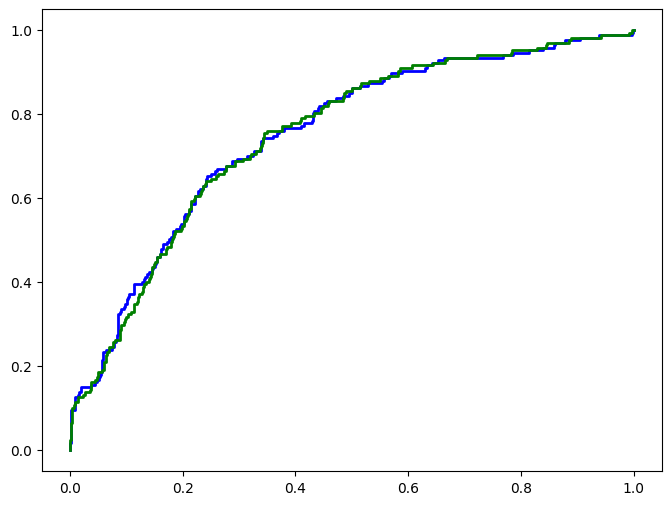

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asumiendo que ya tienes X (características) y y (etiquetas) definidas

# Dividir los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. Escalar los datos usando StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entrenar el modelo sin SMOTE (sin balancear las clases) usando los datos escalados
logreg_no_smote_scaled = LogisticRegression(class_weight='balanced')
logreg_no_smote_scaled.fit(X_train_scaled, y_train)

# Predicciones sin SMOTE
y_pred_no_smote_scaled = logreg_no_smote_scaled.predict(X_test_scaled)

# Calcular métricas sin SMOTE (con datos escalados)
conf_matrix_no_smote_scaled = confusion_matrix(y_test, y_pred_no_smote_scaled)
accuracy_no_smote_scaled = accuracy_score(y_test, y_pred_no_smote_scaled)
recall_no_smote_scaled = recall_score(y_test, y_pred_no_smote_scaled)
precision_no_smote_scaled = precision_score(y_test, y_pred_no_smote_scaled)
f1_no_smote_scaled = f1_score(y_test, y_pred_no_smote_scaled)

# 3. Aplicar SMOTE y entrenar el modelo con datos escalados
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

logreg_smote_scaled = LogisticRegression(class_weight='balanced')
logreg_smote_scaled.fit(X_train_res, y_train_res)

# Predicciones con SMOTE (con datos escalados)
y_pred_smote_scaled = logreg_smote_scaled.predict(X_test_scaled)

# Calcular métricas con SMOTE (con datos escalados)
conf_matrix_smote_scaled = confusion_matrix(y_test, y_pred_smote_scaled)
accuracy_smote_scaled = accuracy_score(y_test, y_pred_smote_scaled)
recall_smote_scaled = recall_score(y_test, y_pred_smote_scaled)
precision_smote_scaled = precision_score(y_test, y_pred_smote_scaled)
f1_smote_scaled = f1_score(y_test, y_pred_smote_scaled)

# Mostrar resultados sin y con SMOTE con escalado
print("Sin SMOTE (con datos escalados):")
print("Matriz de Confusión:")
print(conf_matrix_no_smote_scaled)
print(f"Accuracy: {accuracy_no_smote_scaled:.4f}")
print(f"Recall: {recall_no_smote_scaled:.4f}")
print(f"Precision: {precision_no_smote_scaled:.4f}")
print(f"F1-Score: {f1_no_smote_scaled:.4f}")
print("\n")

print("Con SMOTE (con datos escalados):")
print("Matriz de Confusión:")
print(conf_matrix_smote_scaled)
print(f"Accuracy: {accuracy_smote_scaled:.4f}")
print(f"Recall: {recall_smote_scaled:.4f}")
print(f"Precision: {precision_smote_scaled:.4f}")
print(f"F1-Score: {f1_smote_scaled:.4f}")

# Calcular la curva ROC y AUC para ambas configuraciones (con datos escalados)
y_prob_no_smote_scaled = logreg_no_smote_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_no_smote_scaled, tpr_no_smote_scaled, thresholds_no_smote_scaled = roc_curve(y_test, y_prob_no_smote_scaled)
roc_auc_no_smote_scaled = auc(fpr_no_smote_scaled, tpr_no_smote_scaled)

y_prob_smote_scaled = logreg_smote_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_smote_scaled, tpr_smote_scaled, thresholds_smote_scaled = roc_curve(y_test, y_prob_smote_scaled)
roc_auc_smote_scaled = auc(fpr_smote_scaled, tpr_smote_scaled)

# Graficar las curvas ROC para ambas configuraciones (con datos escalados)
plt.figure(figsize=(8, 6))

# Curva ROC sin SMOTE
plt.plot(fpr_no_smote_scaled, tpr_no_smote_scaled, color='blue', lw=2, label=f'Sin SMOTE (AUC = {roc_auc_no_smote_scaled:.2f})')

# Curva ROC con SMOTE
plt.plot(fpr_smote_scaled, tpr_smote_scaled, color='green', lw=2, label=f'Con SMOTE (AUC = {roc_auc_smote_scaled:.2f})')

# Línea diagonal de referencia (no discriminante)



### Pinte todas las graficas original SMOTE y SMOTE Scaler

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

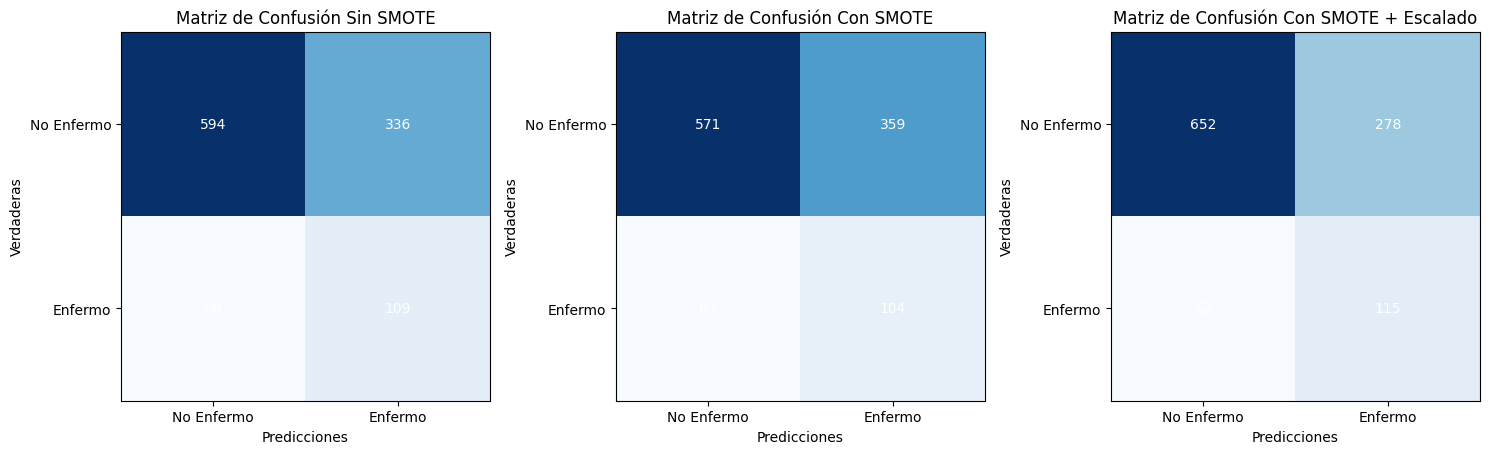

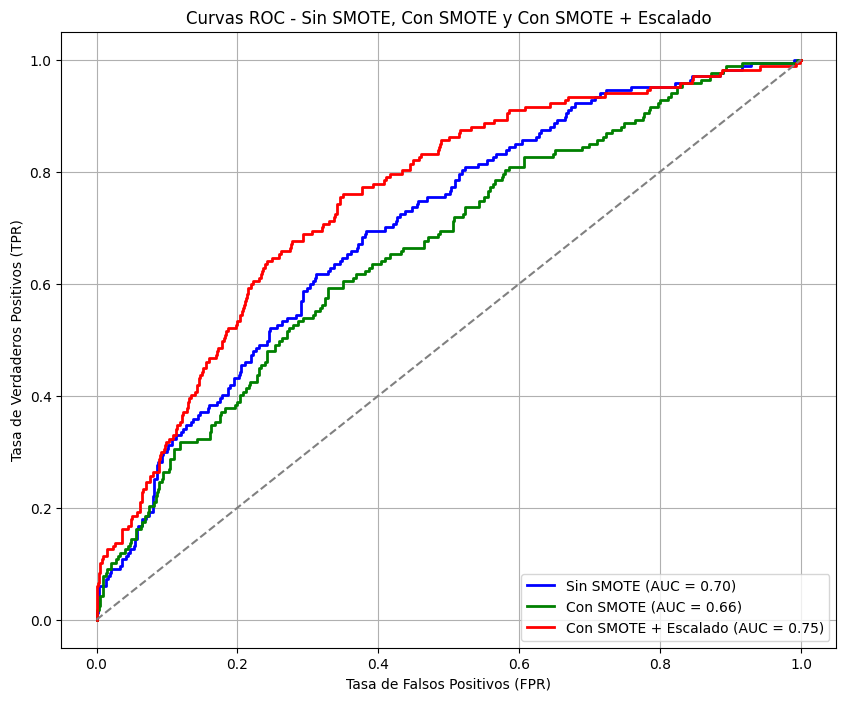

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asumiendo que ya tienes X (características) y y (etiquetas) definidas

# Dividir los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. Modelo original sin SMOTE y sin escalado
logreg_no_smote = LogisticRegression(class_weight='balanced')
logreg_no_smote.fit(X_train, y_train)
y_pred_no_smote = logreg_no_smote.predict(X_test)

# Calcular métricas sin SMOTE (sin escalado)
conf_matrix_no_smote = confusion_matrix(y_test, y_pred_no_smote)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
recall_no_smote = recall_score(y_test, y_pred_no_smote)
precision_no_smote = precision_score(y_test, y_pred_no_smote)
f1_no_smote = f1_score(y_test, y_pred_no_smote)

# 2. Aplicar SMOTE y entrenar el modelo
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression(class_weight='balanced')
logreg_smote.fit(X_train_res, y_train_res)
y_pred_smote = logreg_smote.predict(X_test)

# Calcular métricas con SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# 3. Aplicar SMOTE y StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_res_scaled, y_train_res_scaled = smote.fit_resample(X_train_scaled, y_train)

logreg_smote_scaled = LogisticRegression(class_weight='balanced')
logreg_smote_scaled.fit(X_train_res_scaled, y_train_res_scaled)
y_pred_smote_scaled = logreg_smote_scaled.predict(X_test_scaled)

# Calcular métricas con SMOTE y StandardScaler
conf_matrix_smote_scaled = confusion_matrix(y_test, y_pred_smote_scaled)
accuracy_smote_scaled = accuracy_score(y_test, y_pred_smote_scaled)
recall_smote_scaled = recall_score(y_test, y_pred_smote_scaled)
precision_smote_scaled = precision_score(y_test, y_pred_smote_scaled)
f1_smote_scaled = f1_score(y_test, y_pred_smote_scaled)

# Calcular la curva ROC y AUC para las tres configuraciones

# Sin SMOTE (sin escalado)
y_prob_no_smote = logreg_no_smote.predict_proba(X_test)[:, 1]
fpr_no_smote, tpr_no_smote, _ = roc_curve(y_test, y_prob_no_smote)
roc_auc_no_smote = auc(fpr_no_smote, tpr_no_smote)

# Con SMOTE
y_prob_smote = logreg_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Con SMOTE y StandardScaler
y_prob_smote_scaled = logreg_smote_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_smote_scaled, tpr_smote_scaled, _ = roc_curve(y_test, y_prob_smote_scaled)
roc_auc_smote_scaled = auc(fpr_smote_scaled, tpr_smote_scaled)

# Graficar las matrices de confusión para las tres configuraciones
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original sin SMOTE
axs[0].imshow(conf_matrix_no_smote, interpolation='nearest', cmap=plt.cm.Blues)
axs[0].set_title('Matriz de Confusión Sin SMOTE')
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, str(conf_matrix_no_smote[i, j]), ha="center", va="center", color="white")
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Verdaderas')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(['No Enfermo', 'Enfermo'])
axs[0].set_yticklabels(['No Enfermo', 'Enfermo'])

# Con SMOTE
axs[1].imshow(conf_matrix_smote, interpolation='nearest', cmap=plt.cm.Blues)
axs[1].set_title('Matriz de Confusión Con SMOTE')
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, str(conf_matrix_smote[i, j]), ha="center", va="center", color="white")
axs[1].set_xlabel('Predicciones')
axs[1].set_ylabel('Verdaderas')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(['No Enfermo', 'Enfermo'])
axs[1].set_yticklabels(['No Enfermo', 'Enfermo'])

# Con SMOTE y StandardScaler
axs[2].imshow(conf_matrix_smote_scaled, interpolation='nearest', cmap=plt.cm.Blues)
axs[2].set_title('Matriz de Confusión Con SMOTE + Escalado')
for i in range(2):
    for j in range(2):
        axs[2].text(j, i, str(conf_matrix_smote_scaled[i, j]), ha="center", va="center", color="white")
axs[2].set_xlabel('Predicciones')
axs[2].set_ylabel('Verdaderas')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(['No Enfermo', 'Enfermo'])
axs[2].set_yticklabels(['No Enfermo', 'Enfermo'])

plt.tight_layout()
plt.show()

# Graficar las curvas ROC para las tres configuraciones
plt.figure(figsize=(10, 8))

# Curva ROC sin SMOTE
plt.plot(fpr_no_smote, tpr_no_smote, color='blue', lw=2, label=f'Sin SMOTE (AUC = {roc_auc_no_smote:.2f})')

# Curva ROC con SMOTE
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label=f'Con SMOTE (AUC = {roc_auc_smote:.2f})')

# Curva ROC con SMOTE + Escalado
plt.plot(fpr_smote_scaled, tpr_smote_scaled, color='red', lw=2, label=f'Con SMOTE + Escalado (AUC = {roc_auc_smote_scaled:.2f})')

# Línea diagonal de referencia (no discriminante)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Sin SMOTE, Con SMOTE y Con SMOTE + Escalado')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
